<B>Puʻu ʻŌʻō eruption</B>

Puʻu ʻŌʻō is a volcanic cone in the eastern rift zone of the Kīlauea volcano of the Hawaiian Islands. Until the end of April 2018, Puʻu ʻŌʻō had been erupting nearly continuously since January 3, 1983, making it the longest-lived rift-zone eruption of the last two centuries. 


<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Puu_Oo_-_Crater_Lava_pond_1990.jpg/220px-Puu_Oo_-_Crater_Lava_pond_1990.jpg>

This image is a aerial view of Puʻu ʻŌʻō taken on August 30, 1990.

<B>Last activity</B>

On April 30, 2018, the Pu‘u ‘Ō‘ō crater floor collapsed, as lava drained out and flowed underground approximately 10 miles downrift. Residents in the Puna area, located on southeast coastline of the island were asked to evacuate. On May 3, 2018, the Pacific Tsunami Warning Center reported a 4.6 magnitude earthquake off the south flank of the volcano. The USGS reported that there were nearly 70 earthquakes of magnitude 2.5 or stronger from Tuesday, May 1 to Wednesday, May 2. On May 3, fissures opened up at the Leilani Estates, and the new fissures from the lower Puna eruption replaced the 61g flow as the active area of eruption. Afterward, work resumed to make the Chain of Craters Road passable, as an evacuation route for nearby threatened areas. 

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/USGS_K%C4%ABlauea_multimediaFile-1936.jpg/220px-USGS_K%C4%ABlauea_multimediaFile-1936.jpg>

This image shows the collapse in the crater of Pu‘u ‘Ō‘ō that created an ash plume (May 3, 2018).

<B>Reapeting Earthquakes</B>

Repeating earthquakes, or repeaters, are identical in location and geometry but occur at different times. They appear to represent recurring seismic energy release from distinct structures such as slip on a fault patch. Repeaters are most commonly found on creeping plate boundary faults, where seismic patches are loaded by surrounding slow slip, and they can be used to track fault creep at depth. Their hosting environments also include volcanoes, subducted slabs, mining-induced fault structures, glaciers, and landslides. While true repeaters should have identical seismic waveforms, small differences in their seismograms can be used to examine subtle changes in source properties or in material properties of the rocks through which the waves propagate. Source studies have documented the presence of smaller slip patches within the rupture areas of larger repeaters, illuminated earthquake triggering mechanisms, and revealed systematic changes in rupture characteristics as a function of loading rate.

The main objective is to identify if the seismicity reported during the eruptive activity and collapse was repetitive seismicity.

<B>Main Code</B>

To begin, we need to identify the station (s) close to the area of interest

We can request a seismogram to see the seismic activity following the collapse of Puu Oo. For this, we can use the FDSN webservices client for Obspy. Also, we need to define the start time and the end time and we will use the get_station function to retrive an inventory of stations.


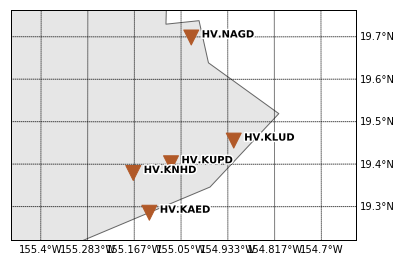

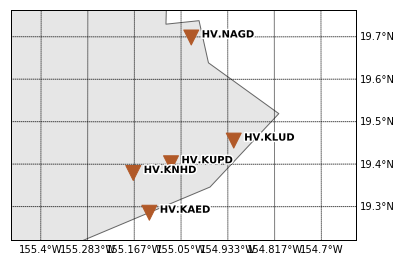

In [108]:
# import all libraries 
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr
import matplotlib.pyplot as plt
import numpy as np

client=Client("IRIS")

# Date when occur the collapse
start=UTCDateTime("2018-04-30T14:00-10")
end=start+24*60*60

# Inventory of available stations
# We select the specific area, so we identify the appropriate latitude and longitude.
inv = client.get_stations(network="HV",station="*",channel="EHZ",level="channel",starttime=start, endtime=end, minlatitude="19.25", maxlatitude="19.75", minlongitude="-155.22", maxlongitude="-154")
inv.plot(projection="local")


Now, we can see the stations in the area that we specified, so we can select the stations that are closest to the  event. For this, we select the station KLUD and KUPD.

Now, we obtain the records from both stations to visualize the seismicity for May 1.

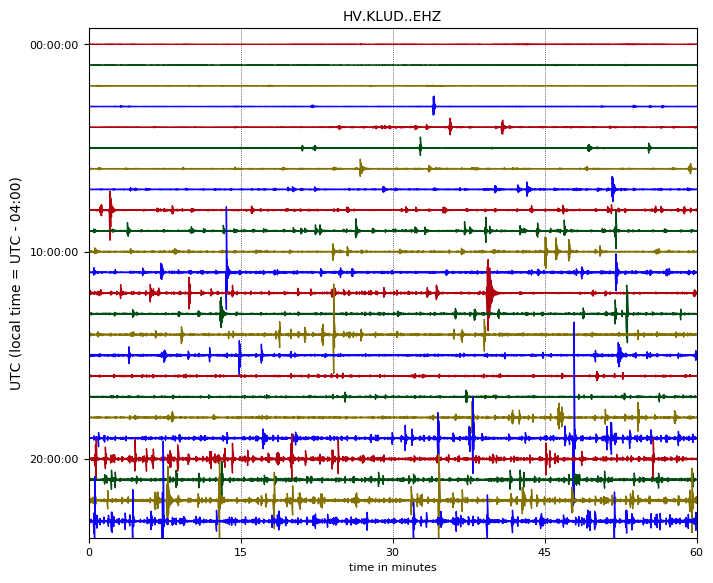

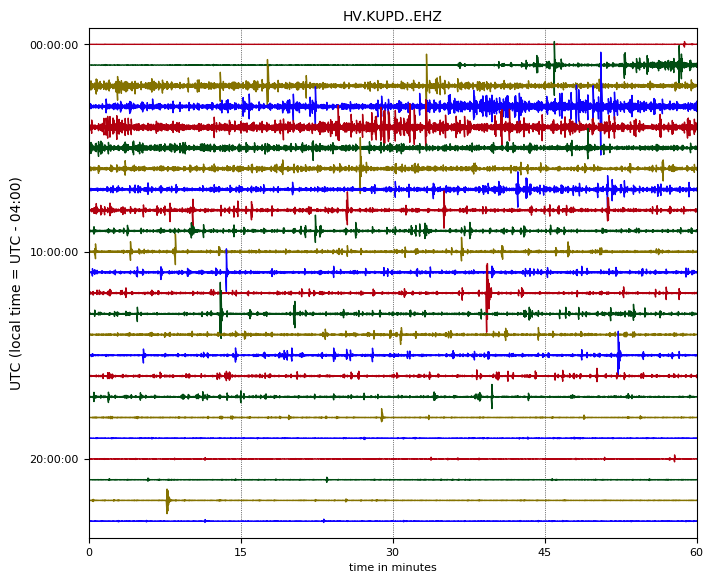

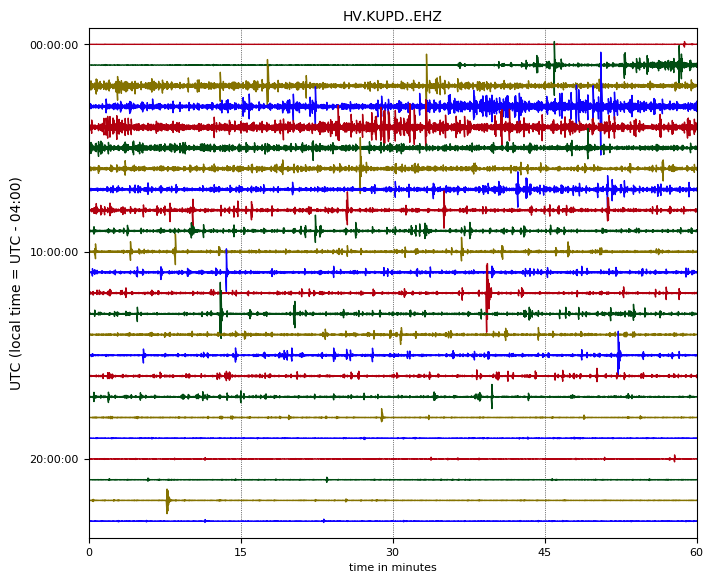

In [103]:
# Obtaining waveforms for 24 hours
stream1= client.get_waveforms("HV","KLUD","","EHZ",start, end)
stream1.plot(type="dayplot", interval=60)

stream2 = client.get_waveforms("HV","KUPD","","EHZ",start, end)
stream2.plot(type="dayplot", interval=60)

As we can see, the seismicity in both stations is slightly different, it may be due to the own seismicity record where the stations are located, and because of the distance from the other. For this reason, it is not possible to appreciate the same differentiated change in both as to be able to make a comparison between signals in the entire register shown. However, you can see certain signals larger than if they have been recorded in both stations.

However, if we take a smaller segment of the record, we can observe the signals that have been recorded with their respectic spectrogram.

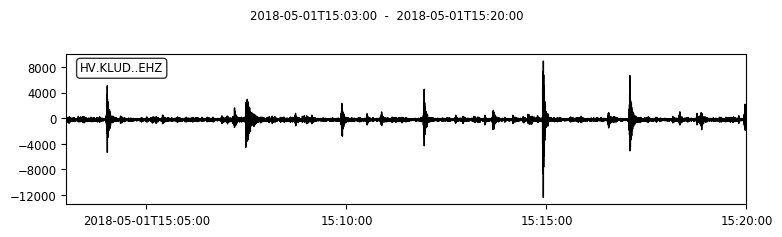

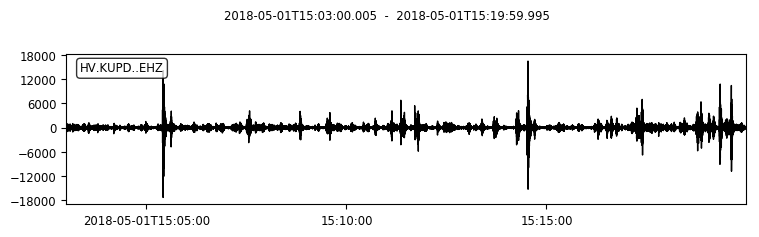

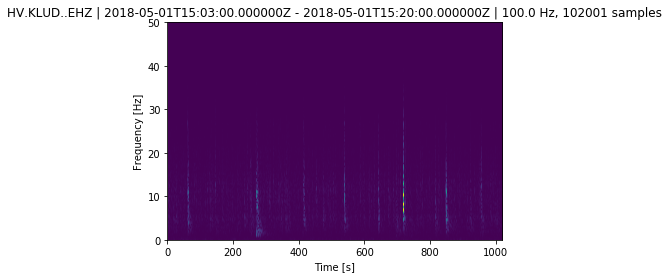

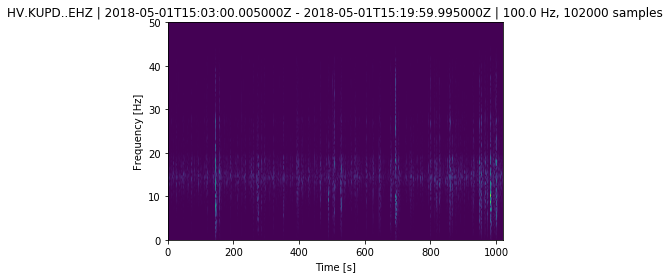

In [104]:
# We choose a small segment of time 
start1=UTCDateTime("2018-05-01T15:03")
end1=UTCDateTime("2018-05-01T15:20")

# Obtaining waveforms for 23 minutes 
st1 = client.get_waveforms("HV","KLUD","","EHZ",start1, end1)
st2 = client.get_waveforms("HV","KUPD","","EHZ",start1, end1)
tr1=st1[0]
tr2=st2[0]

fig1=tr1.plot()
fig2=tr2.plot()

# Spectograms
fig3=tr1.spectrogram(per_lap=.5, wlen=2)  
fig4=tr2.spectrogram(per_lap=.5, wlen=2)  

With the above, we can appreciate some differences between the signals that both stations are recording as their spectral variation with the time and dominance at high frequencies. 

Now we will work specifically with the largest station which is KLUD, which did register the event that occurred during the collapse.

<B> Cross Correlation </B>

Now, we will work with a specific signals that you can select in the KULD's recording.



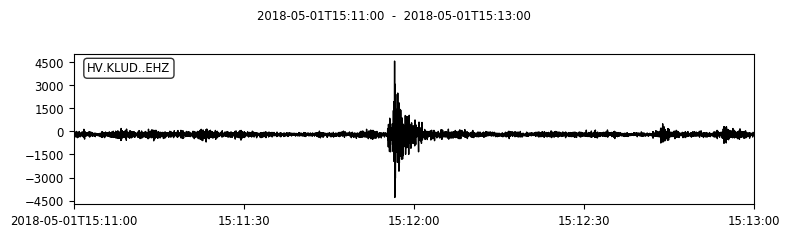

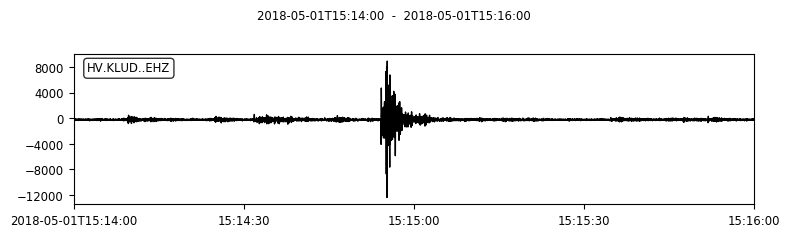

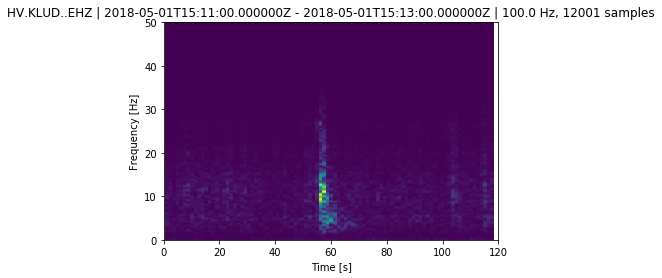

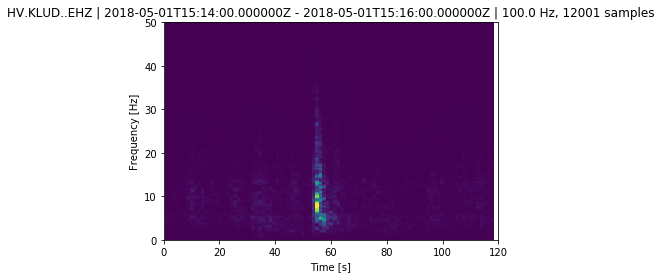

The Samprate for KULD is: 100.0   The Samprate for KUPD is: 100.0


/usr/local/lib/python3.5/dist-packages/obspy/signal/cross_correlation.py:390: ObsPyDeprecationWarning: Call to deprecated function xcorr(). Please use the correlate and xcorr_max functions.
  warnings.warn(msg, ObsPyDeprecationWarning)


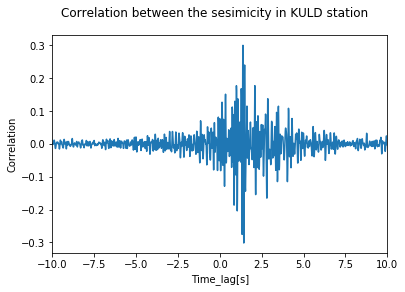

In [109]:
# We select two signals in the recording that we want to correlate 

# We choose the especific lapse of time
# Firts signal
st1=UTCDateTime("2018-05-01T15:11")
et1=UTCDateTime("2018-05-01T15:13")
# Second signal
st2=UTCDateTime("2018-05-01T15:14")
et2=UTCDateTime("2018-05-01T15:16")

# Obtaining waveforms for specific lapse of time
st1 = client.get_waveforms("HV","KLUD","","EHZ",st1, et1)
st2 = client.get_waveforms("HV","KLUD","","EHZ",st2, et2)

tr1=st1[0]
tr2=st2[0]

fig1=tr1.plot()
fig2=tr2.plot()

# Spectrograms
fig3=tr1.spectrogram(per_lap=.5, wlen=2)               
fig4=tr2.spectrogram(per_lap=.5, wlen=2)  

# Sampling rate
samprate1=tr1.stats.sampling_rate
samprate2=tr2.stats.sampling_rate
print("The Samprate for KULD is:",samprate1,"  The Samprate for KUPD is:",samprate2)

# Cross Correlation
timelag =10 # Delay time 
shift_len = int(samprate1*timelag)
index,value,fct = xcorr(tr1,tr2,shift_len,full_xcorr=True)
t = np.arange(-timelag, timelag + timelag/(samprate1*timelag), timelag/(samprate1*timelag))
plt.plot(t,fct)
plt.xlim(-timelag, timelag)
plt.xlabel('Time_lag[s]')
plt.ylabel('Correlation')
plt.suptitle('Correlation between the sesimicity in KULD station')
plt.show()

We only compare two signals, but we can proceed in the same way with all the signals we have already seen. In this case, we can establish that a family or cluster will form if we identify two or more members of events that have similar waveforms, if this is correct, these events that we correlate, we can identify them as repeating earthquakes of the same family.